In [1]:
#%autosave 0
from IPython.core.display import HTML, display
display(HTML('<style>.container { width:100%; !important } </style>'))

# Tries

A <a href="https://en.wikipedia.org/wiki/Trie">Trie</a> is a data structure that implements the abstract data type of a <em style="color:blue;">dictionary</em> in the case that the keys are strings.
The set $\mathbb{T}$ of all tries is defined inductively using the constructor 
$$ \texttt{Node}: \texttt{Value} \times \texttt{List}(\Sigma) \times\texttt{List}(\mathbb{T}) \rightarrow \mathbb{T}. $$ 
The inductive definition of the set $\mathbb{T}$ has only a single clause: If
  - $v \in \texttt{Value} \cup \{\Omega\}$,
  - $C = [c_1, \cdots, c_n] \in \texttt{List}(\Sigma)$ is a list of different characters of length $n$ and
  - $T = [t_1, \cdots, t_n] \in \texttt{List}(\mathbb{T})$ is a list of tries of the same length $n$, 

then we have 
$$ \texttt{Node}(v, C, T) \in \mathbb{T}. $$  

An object $t$ of the class `Trie` represents the <em style="color:blue;">trie</em>
$$ \texttt{Node}(t.\texttt{mValue}, t.\texttt{mChars}, t.\texttt{mTries}). $$
The constructor creates an empty <em style="color:blue;">trie</em>.

In [2]:
class Trie():
    def __init__(self):
        self.mValue  = None
        self.mChars  = []
        self.mTries  = []
        self.mParent = '' # only used by graphviz

The function `find` has the signature
$$ \texttt{find}: \mathbb{T} \times \Sigma^* \rightarrow \texttt{Value} \cup \{ \Omega\}. $$
For a trie $t$ and a string $s$, the expression $t.\texttt{find}(s)$ returns the
value that is associated with the key $s$ in $t$.  The expression
$\texttt{Node}(v,C,T).\texttt{find}(s)$ is defined by induction on the length of the  string $s$:
  - $\texttt{Node}(v, C, T).\texttt{find}(\varepsilon) = v$.
  
    The value associated with the empty string $\varepsilon$ is stored at the root of the trie.
  - $\texttt{Node}(v, [c_1, \cdots, c_n], [t_1, \cdots, t_n]).\texttt{find}(cr) = 
        \left\{
        \begin{array}{ll}
        t_1.\texttt{find}(r) & \mbox{if} \quad c = c_1 \mbox{;} \\
        \vdots &                                     \\
        t_i.\texttt{find}(r) & \mbox{if} \quad c = c_i \mbox{;} \\
        \vdots &                                     \\
        t_n.\texttt{find}(r) & \mbox{if} \quad c = c_n \mbox{;} \\[0.2cm]
        \Omega               & \mbox{if} \quad c \notin \{c_1,\cdots,c_n\} \mbox{.}         
        \end{array}
       \right.
    $

    The trie $\texttt{Node}(v, [c_1, \cdots, c_n], [t_1, \cdots, t_n])$ associates a value with
    the key $cr$ if the list $[c_1, \cdots, c_n]$ has a position $i$ such that $c$ equals $c_i$
    and, furthermore, the trie  $t_i$ associates a value with the key  $r$.


In [3]:
def find(self, s):
    if s == '':
        return self.mValue
    c, r = s[0], s[1:]
    for i, ci in enumerate(self.mChars):
        if c == ci:
            return self.mTries[i].find(r)

Trie.find = find

The signature of the method $\texttt{insert}$ is given as follows:
$$ \texttt{insert}: \mathbb{T} \times \Sigma^* \times \texttt{Value} \rightarrow \mathbb{T}. $$
The result of evaluating 
$$ \texttt{Node}(v_1, [c_1, \cdots, c_n], [t_1, \cdots, t_n]).\texttt{insert}(w, v_2) $$
for a string $w\in \Sigma^*$ and a value $v_2 \in \texttt{Value}$ is defined by induction on the
length of $w$:
  - $\texttt{Node}(v_1,L,T).\texttt{insert}(\varepsilon, v_2) = \texttt{Node}(v_2,L,T)$.
  
    If a new value $v_2$ is associated with the empty string $\varepsilon$, then the old value
    $v_1$, which had been stored at the root before, is overwritten.
  - $\texttt{Node}\bigl(v_1,[c_1,\cdots,c_i,\cdots,c_n], [t_1,\cdots,t_i,\cdots,t_n]\bigr).\texttt{insert}(c_ir,v_2) =
     \texttt{Node}\bigl(v_1,[c_1,\cdots,c_i,\cdots,c_n], [t_1,\cdots,t_i.\texttt{insert}(r,v_2),\cdots,t_n]\bigr)$.

    In order to associate a value $v_2$ with the string $c_ir$ in the trie
    $$ \texttt{Node}\bigl(v_1,[c_1,\cdots,c_i,\cdots,c_n], [t_1,\cdots,t_i,\cdots,t_n]\bigr) $$ 
    we have to recursively associate the value $v_2$ with the string $r$ in the trie $t_i$.
  - $c \not\in\{c_1,\cdots,c_n\} \;\rightarrow\;\texttt{Node}\bigl(v_1,[c_1,\cdots,c_n], [t_1,\cdots,t_n]\bigr).\texttt{insert}(cr,v_2) =
     \texttt{Node}\bigl(v_1,[c_1,\cdots,c_n,c], [t_1,\cdots,t_n,\texttt{Node}(\Omega,[],[]).\texttt{insert}(r,v_2)]\bigr)$.
      
    If we want to associate a value $v$ with the key $cr$ in the trie
    $\texttt{Node}\bigl(v_1,[c_1,\cdots,c_n], [t_1,\cdots,t_n]\bigr)$ then, if the character $c$
    does not occur in the list $[c_1,\cdots,c_n]$, we first have to create a new empty trie.
    This trie has the form 
    $$ \texttt{Node}(\Omega, [], []). $$ 
    Next, we associate the value $v_2$ with the key $r$ in this empty trie.  Finally,
    we append the character $c$ to the end of the list $[c_1,\cdots,c_n]$ and append the trie
    $$ \texttt{Node}(\Omega, [], []).\texttt{insert}(r,v_2) $$ 
    to the end of the list $[t_1,\cdots,t_n]$.

In [4]:
def insert(self, s, v):
    if s == '':
        self.mValue = v
        return
    c, r = s[0], s[1:]
    for i, ci in enumerate(self.mChars):
        if c == ci:
            self.mTries[i].insert(r, v)
            return
    t = Trie()
    t.insert(r, v)
    t.mParent = c # necessary for visualization
    self.mChars.append(c)
    self.mTries.append(t)
    
Trie.insert = insert

In order to implement deletion in tries, we need the auxiliary function `isEmpty`.  Its signature is given as
$$ \texttt{isEmpty}: \mathbb{T} \rightarrow \mathbb{B}. $$
For a trie $t$, we have $t.\texttt{isEmpty}() = \texttt{True}$ if and only if the trie $t$ does not
store any key.  The following formula specifies the function $\texttt{isEmpty}$:
$$ \texttt{Node}(v, L, T).\texttt{isEmpty}() = \mathtt{True} \Leftrightarrow v = \Omega \wedge L = []. $$

In [5]:
def isEmpty(self):
    return self.mValue == None and self.mChars == []

Trie.isEmpty = isEmpty

For a trie  $t \in \mathbb{T}$ and a string $w \in \Sigma^*$ the value $t.\texttt{delete}(w)$
is defined by induction on the length of  $w$.
  - $\texttt{Node}(v,C,T).\texttt{delete}(\varepsilon) = \texttt{Node}(\Omega,C,T)$

    The value that is associated with the empty  string $\varepsilon$ is stored at the root of the
    trie where is can be deleted without further ado.
  - $\begin{array}[t]{ll}
     t_i.\texttt{delete}(r).\texttt{isEmpty}()   & \rightarrow \\
     \texttt{Node}(v, [c_1,\cdots,c_i,\cdots,c_n],[t_1,\cdots,t_i,\cdots,t_n]).\texttt{delete}(c_ir) 
     & = \\
     \qquad 
     \texttt{Node}(v, [c_1,\cdots,c_{i-1},c_{i+1},\cdots,c_n],[t_1,\cdots,t_{i-1},t_{i+1},\cdots,t_n]).
     \end{array}
    $

    If  the key that is to be deleted starts with the character $c_i$ and if deletion of  the key
    $r$ in the $i$th  trie $t_i$ yields an empty
    trie, then both the $i$th character $c_i$ and the $i$th trie $t_i$ are deleted.
  - $\begin{array}[t]{ll}
     \neg t_i.\texttt{delete}(r).\texttt{isEmpty}()   & \rightarrow \\
     \texttt{Node}(v, [c_1,\cdots,c_i,\cdots,c_n],[t_1,\cdots,t_i,\cdots,t_n]).\texttt{delete}(c_ir) 
     & = \\
     \qquad \texttt{Node}(v, [c_1,\cdots,c_i,\cdots,c_n],[t_1,\cdots,t_i.\texttt{delete}(r),\cdots,t_n]).
     \end{array}
    $

    If  the key that is to be deleted starts with the character $c_i$ and if deletion of  the key
    $r$ in the $i$th  trie $t_i$ yields a non-empty trie, then the key $r$ has to be deleted recursively
    in the trie $t_i$.
  - $c \notin C \rightarrow \texttt{Node}(v, C, T).\texttt{delete}(cr) =
       \texttt{Node}(v, C, T)$. 
       
    If  the key that is to be deleted starts with the character $c$ and  $c$ does not occur in
    the list of characters $C$, then the trie does not contain the key $cr$ and therefore there
    is nothing  to do:  The trie is left unchanged.

In [6]:
def delete(self, s):
    if s == '':
        self.mValue = None
        return
    c, r = s[0], s[1:]
    for i, ci in enumerate(self.mChars):
        if c == ci:
            self.mTries[i].delete(r)
            if self.mTries[i].isEmpty():
                self.mChars.pop(i)
                self.mTries.pop(i)
            return
        
Trie.delete = delete

In [7]:
import graphviz as gv

In [8]:
def toDot(self):
    Trie.sNodeCount = 0 # this is a static variable of the class Trie
    dot = gv.Digraph(node_attr={'shape': 'record', 'style': 'rounded'})
    NodeDict = {}
    self._assignIDs(NodeDict)
    for id, t in NodeDict.items():
        if t.mValue != None:
            dot.node(id, label='{' + t.mParent + '|' + str(t.mValue) + '}')
        else:
            dot.node(id, label=t.mParent)
    for id, t in NodeDict.items():
        for x in t.mTries:
            dot.edge(id, x.mID)
    return dot

Trie.toDot = toDot

In [9]:
def _assignIDs(self, NodeDict):
    Trie.sNodeCount += 1
    self.mID = str(Trie.sNodeCount)
    NodeDict[self.mID] = self
    for t in self.mTries:
        t._assignIDs(NodeDict) 
    
Trie._assignIDs = _assignIDs

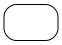

In [10]:
t = Trie()
t.toDot()

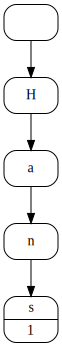

In [11]:
t.insert("Hans", 1)
t.toDot()

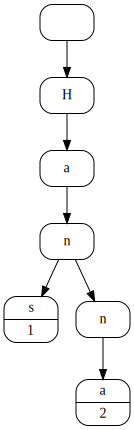

In [12]:
t.insert("Hanna", 2)
t.toDot()

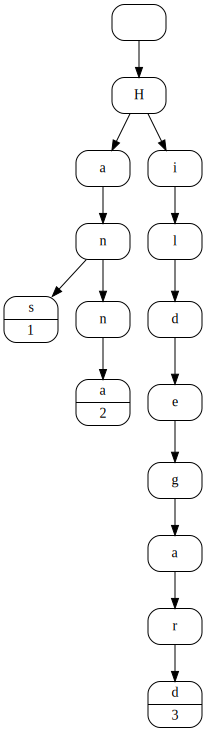

In [13]:
t.insert("Hildegard", 3)
t.toDot()

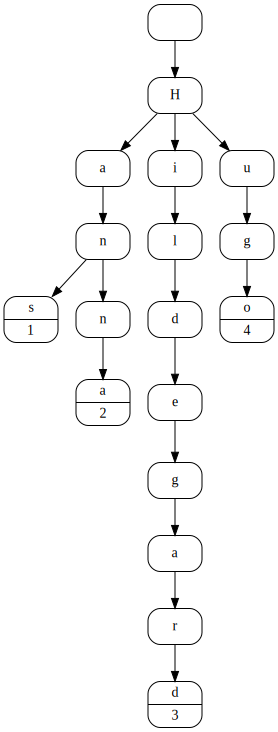

In [14]:
t.insert("Hugo", 4)
t.toDot()

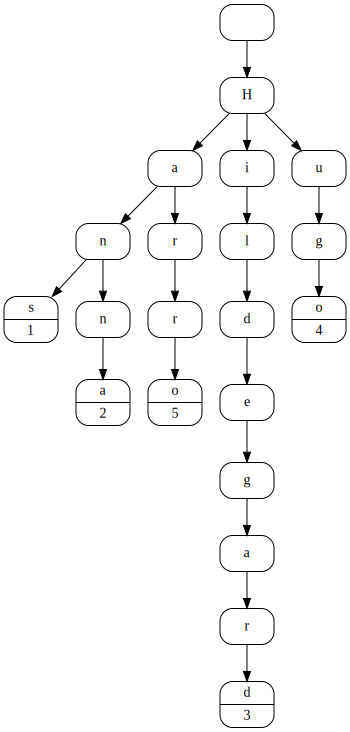

In [15]:
t.insert("Harro", 5)
t.toDot()

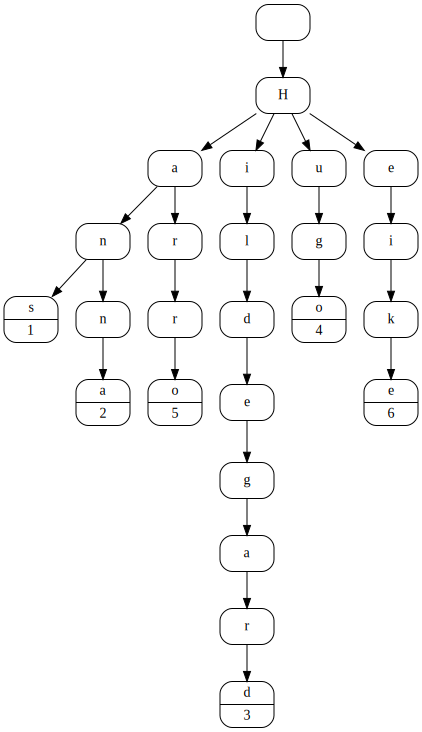

In [16]:
t.insert("Heike", 6)
t.toDot()

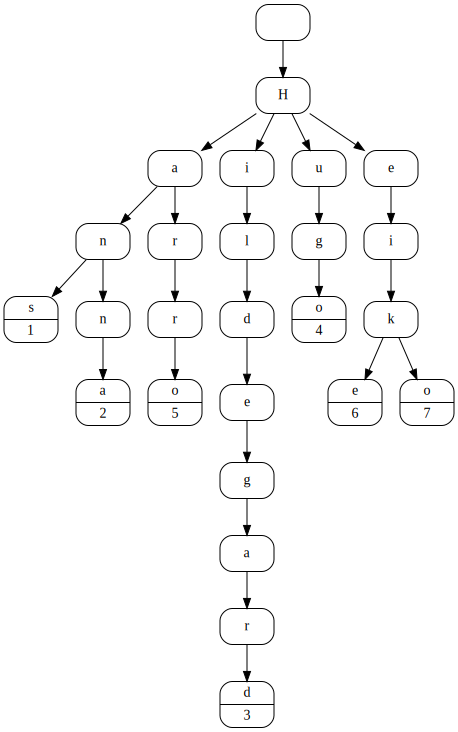

In [17]:
t.insert("Heiko", 7)
t.toDot()

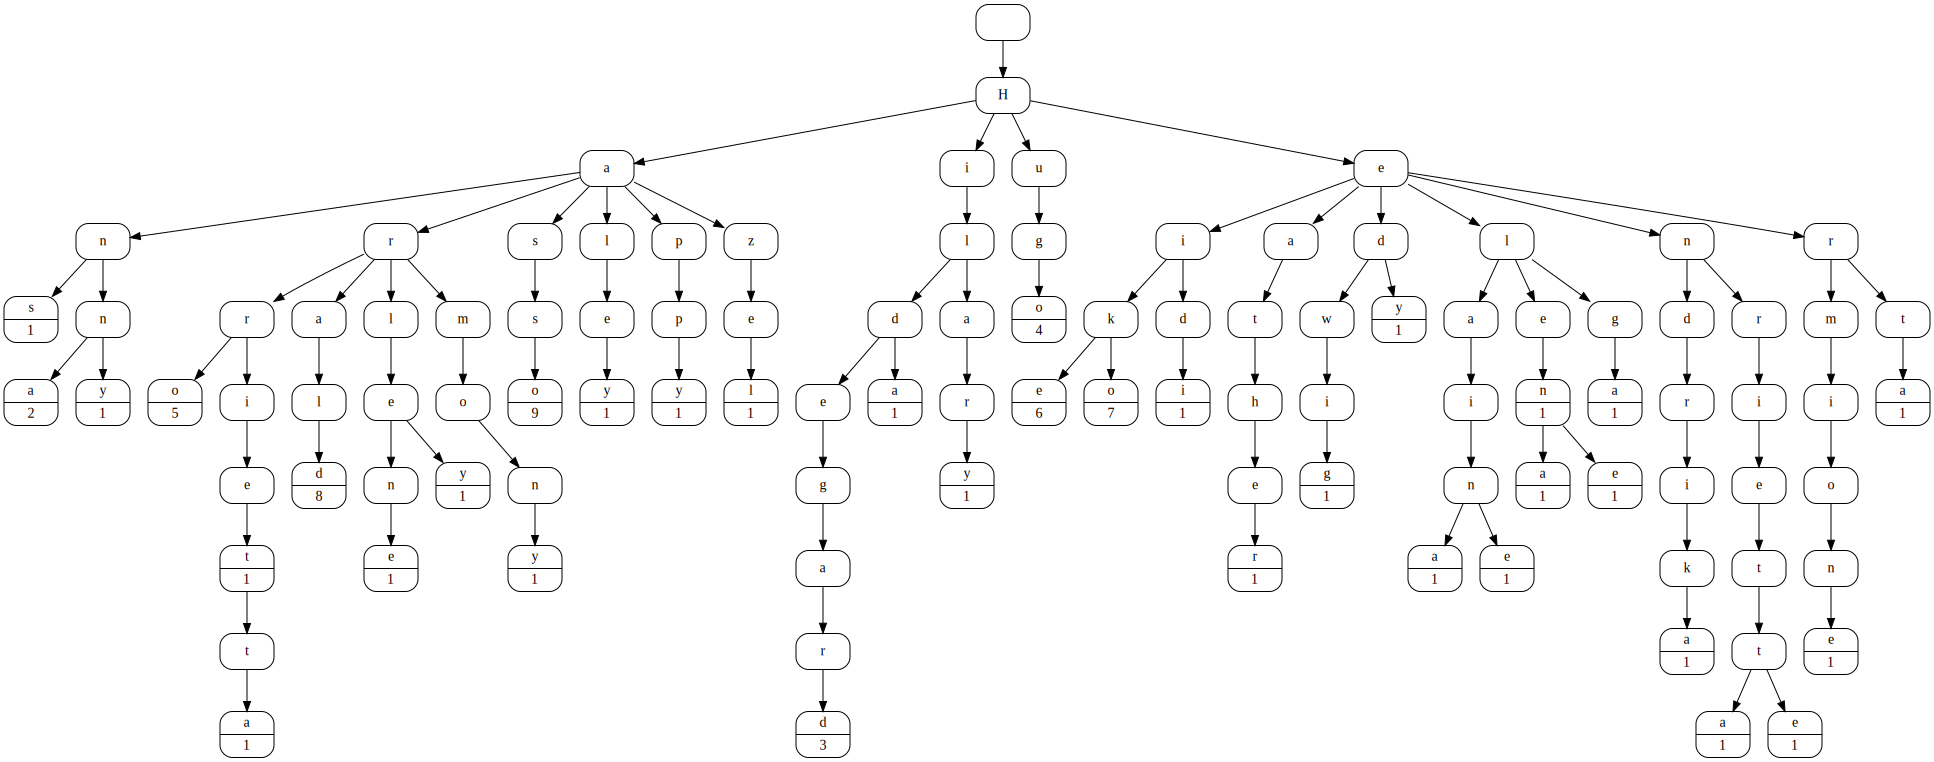

In [18]:
t.insert("Harald", 8)
t.insert("Hasso", 9)
t.insert("Haley", 1)
t.insert("Hanny", 1)
t.insert("Happy", 1)
t.insert("Harlene", 1)
t.insert("Harley", 1)
t.insert("Harmony", 1)
t.insert("Harriet", 1)
t.insert("Harrietta", 1)
t.insert("Hazel", 1)
t.insert("Heather", 1)
t.insert("Hedwig", 1)
t.insert("Hedy", 1)
t.insert("Heidi", 1)
t.insert("Helaina", 1)
t.insert("Helaine", 1)
t.insert("Helen", 1)
t.insert("Helena", 1)
t.insert("Helene", 1)
t.insert("Helga", 1)
t.insert("Hendrika", 1)
t.insert("Henrietta", 1)
t.insert("Henriette", 1)
t.insert("Hermione", 1)
t.insert("Herta", 1)
t.insert("Hilary", 1)
t.insert("Hilda", 1)
t.toDot()

In [19]:
t.find('Hildegard')

3

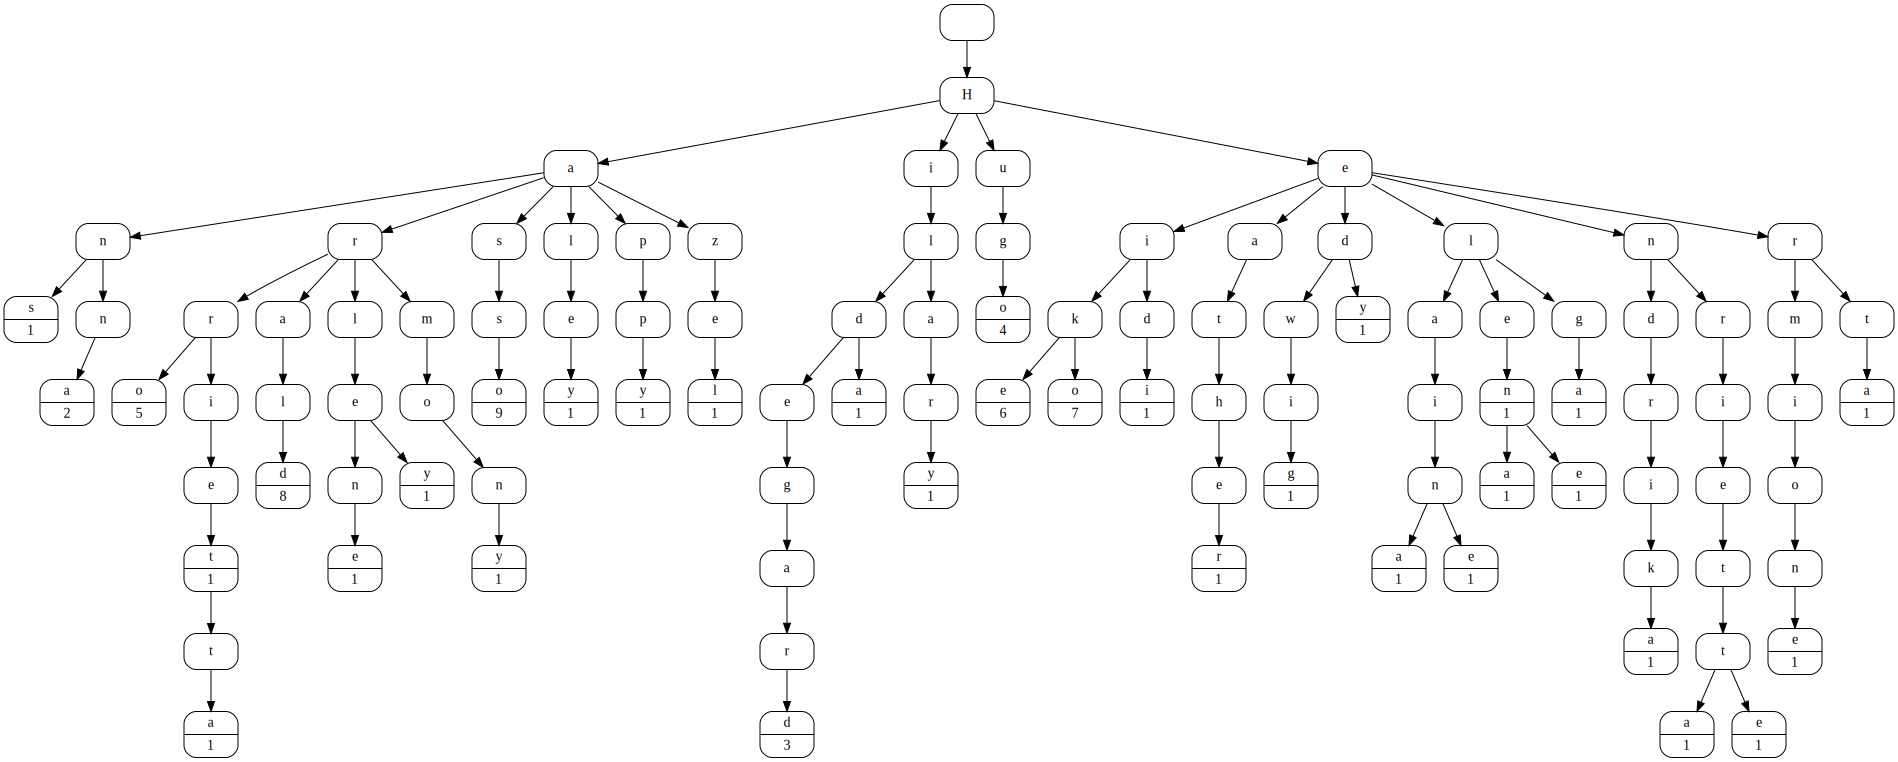

In [20]:
t.delete('Hanny')
t.toDot()

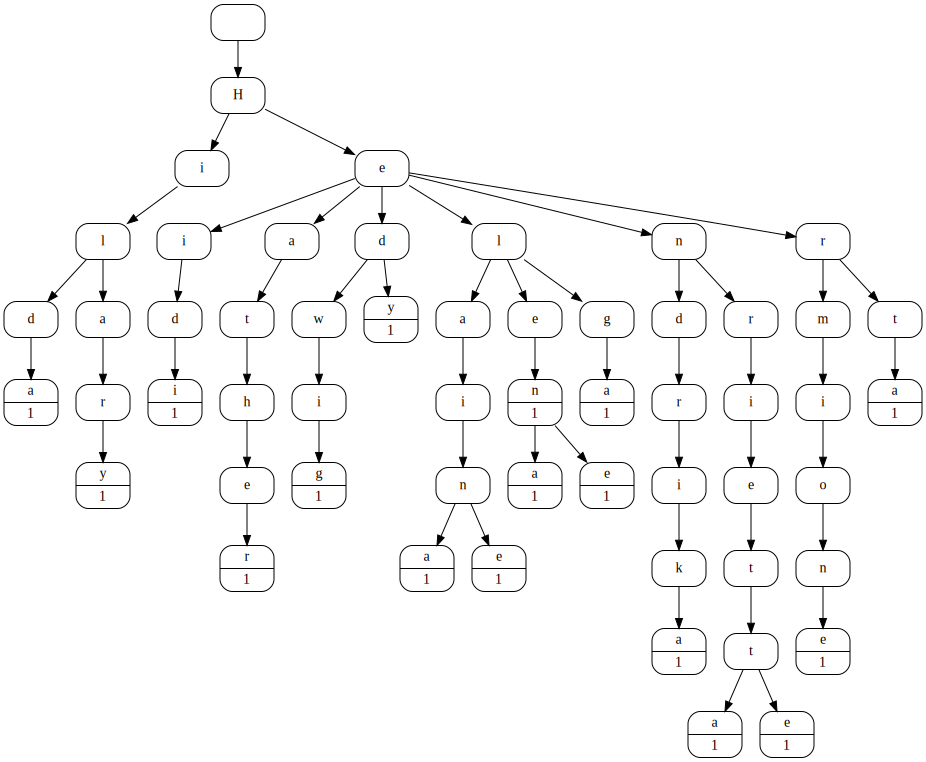

In [21]:
t.delete("Hans")
t.delete("Hanna")
t.delete("Hildegard")
t.delete("Hugo")
t.delete("Harro")
t.delete("Heike")
t.delete("Heiko")
t.delete("Harald")
t.delete("Hasso")
t.delete("Haley")
t.delete("Hanny")
t.delete("Happy")
t.delete("Harlene")
t.delete("Harley")
t.delete("Harmony")
t.delete("Harriet")
t.delete("Harrietta")
t.delete("Hazel")
display(t.toDot())
t.delete("Heather")
t.delete("Hedwig")
t.delete("Hedy")
t.delete("Heidi")
t.delete("Helaina")
t.delete("Helaine")
t.delete("Helen")
t.delete("Helena")
t.delete("Helene")
t.delete("Helga")
t.delete("Hendrika")
t.delete("Henrietta")
t.delete("Henriette")
t.delete("Hermione")
t.delete("Herta")
t.delete("Hilary")
t.delete("Hilda")

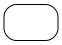

In [22]:
t.toDot()